In [30]:
import pandas as pd
import numpy as np
from scipy.io.arff import loadarff
import clustering
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import testing

## Badanie wpływu skalowania cech na ostateczne wyniki

In [128]:
data = loadarff('datasets/3MC.arff')
table = pd.DataFrame(data[0])

In [129]:
table

,x,y,class
0,-3.053,0.787,b'1'
1,-2.535,1.088,b'1'
2,-2.667,0.611,b'1'
3,-2.598,1.323,b'1'
4,2.173,0.864,b'1'
...,...,...,...
395,-3.295,11.699,b'3'
396,-1.681,11.672,b'3'
397,-2.807,11.867,b'3'
398,-3.830,11.195,b'3'


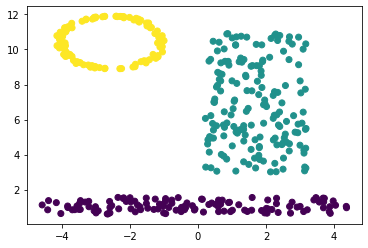

In [130]:
plt.scatter(table['x'], table['y'], c=table['class'])

In [131]:
y = table['class']
X = table.drop(['class'], axis=1)

In [132]:
enc = LabelEncoder()
y = enc.fit_transform(y)

Bez skalowania

In [133]:
nbc = clustering.NBC()
nbc.fit(X)

Najlepsza wartość parametru k:  32
Najlepsza wartość metryki ewaluacji:  0.9762317289626425


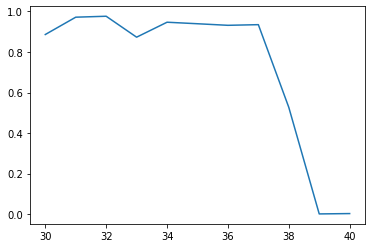

In [134]:
best_k, score = testing.find_best_predictions(X, y, nbc)
print('Najlepsza wartość parametru k: ', best_k)
print('Najlepsza wartość metryki ewaluacji: ', score)

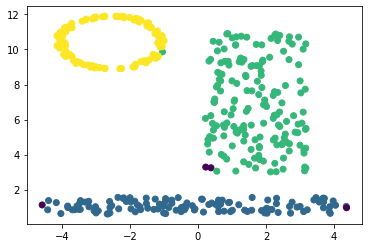

In [135]:
plt.scatter(table['x'], table['y'], c=nbc.predict(X, best_k))

Ze standaryzacją (odchylenie standardowe)

In [136]:
X_copy = X.copy()

In [137]:
scaler = StandardScaler()
X_copy[X_copy.columns] = scaler.fit_transform(X_copy[X_copy.columns])

In [138]:
nbc = clustering.NBC()
nbc.fit(X_copy)

Najlepsza wartość parametru k:  15
Najlepsza wartość metryki ewaluacji:  0.8613469552709685


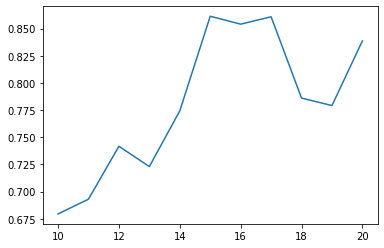

In [139]:
best_k, score = testing.find_best_predictions(X_copy, y, nbc)
print('Najlepsza wartość parametru k: ', best_k)
print('Najlepsza wartość metryki ewaluacji: ', score)

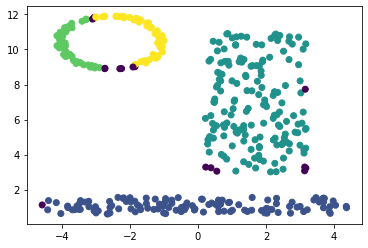

In [140]:
plt.scatter(table['x'], table['y'], c=nbc.predict(X_copy, best_k))

Ze standaryzacją (odchylenie przeciętne/bezwzględne)

In [141]:
def mad_standarization(column):
    mean = column.mean()
    mad = column.mad()
    return (column - mean) / mad

In [142]:
X_copy = X.copy()

In [143]:
X_copy = X_copy.apply(mad_standarization)

In [144]:
nbc = clustering.NBC()
nbc.fit(X_copy)

Najlepsza wartość parametru k:  17
Najlepsza wartość metryki ewaluacji:  0.8594204607265615


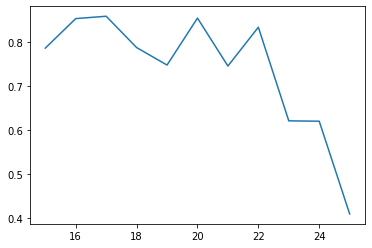

In [145]:
best_k, score = testing.find_best_predictions(X_copy, y, nbc)
print('Najlepsza wartość parametru k: ', best_k)
print('Najlepsza wartość metryki ewaluacji: ', score)

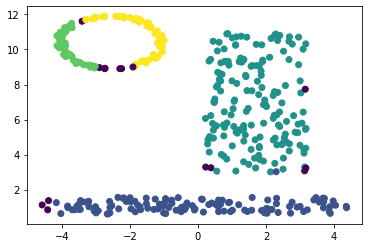

In [146]:
plt.scatter(table['x'], table['y'], c=nbc.predict(X_copy, best_k))

### Wnioski: skalowanie cech źle wpływa na uzyskiwane wyniki grupowania

### Badanie skuteczności algorytmu ze względu na różne stopnie metryki odległości

Stopień odległości l:  1
Najlepsza wartość parametru k:  19
Najlepsza wartość metryki ewaluacji:  0.8953627861618857

Stopień odległości l:  2
Najlepsza wartość parametru k:  32
Najlepsza wartość metryki ewaluacji:  0.9762317289626425

Stopień odległości l:  3
Najlepsza wartość parametru k:  31
Najlepsza wartość metryki ewaluacji:  0.9806612171612701

Stopień odległości l:  4
Najlepsza wartość parametru k:  30
Najlepsza wartość metryki ewaluacji:  0.9746651856580106

Stopień odległości l:  5
Najlepsza wartość parametru k:  30
Najlepsza wartość metryki ewaluacji:  0.9780193819026083



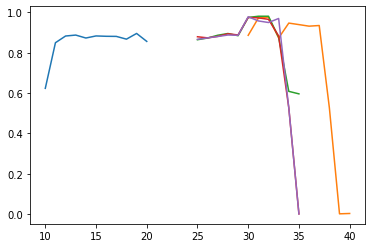

In [149]:
for l in range(1, 6):
    print('Stopień odległości l: ', l)
    nbc = clustering.NBC(l, 'optimized')
    nbc.fit(X)
    best_k, score = testing.find_best_predictions(X, y, nbc)
    print('Najlepsza wartość parametru k: ', best_k)
    print('Najlepsza wartość metryki ewaluacji: ', score)
    print()